In [251]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib as tb
from talib import MA_Type
import requests
import io
import matplotlib.pyplot as plt

In [252]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond shape

In [253]:
def reverse_pyramid(n):
    for i in range(n,-1 ,-1):
        print(" "*(n-i) + "*"*(2*i+1))

In [254]:
def pyramid(n):
    for i in range(n):
        print(" "*(n-i) + "*"*(2*i+1))

In [255]:
a = pyramid(7) 
b = reverse_pyramid(7)


       *
      ***
     *****
    *******
   *********
  ***********
 *************
***************
 *************
  ***********
   *********
    *******
     *****
      ***
       *


# Q2. 刪除重複性的資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [256]:
with open('symbols01.txt') as file:
    symbols01 = file.read()

In [257]:
symbols01= symbols01.split("\n")  

In [258]:
#將資料轉置為set-集合的型態
set01= set(symbols01)

In [259]:
with open('symbols02.txt') as file:
    symbols02 = file.read()

In [260]:
symbols02= symbols02.split("\n") 

In [261]:
set02= set(symbols02)

In [262]:
#將set01與set02做交集即可清除重覆資料，並將資料轉回list
set03= (set01 | set02)
symbols03 = list(set03)

In [263]:
#寫到檔案symbols03
with open('symbols03.txt','w') as f:
    for symbol in symbols03:
        f.write(symbol.strip().upper()+"\n")

# Q3. 下載台灣上市公司基本資料

寫一個程式從 http://dts.twse.com.tw/opendata/t187ap03_L.csv 下載台灣上市公司基本資料，並輸出成 pandas dataframe

In [264]:
r = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")

In [265]:
r.encoding = 'big5'
company_data = r.text.split("\r\n")

In [266]:
company_data = io.StringIO(r.text)
pd.read_csv(company_data, skiprows=1)

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com,NaN
1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,02-2733-8000,...,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw,NaN
1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,(02)2551-5211,...,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw,NaN
1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,02-25077801,...,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com,NaN
1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,25092188,...,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw,NaN
1109,信大水泥股份有限公司,水泥工業,台北市寶慶路37號7樓,3279507.0,楊智雄,楊智雄,吳連富,副總經理,林坤榮,(02)23816731,...,1.0,中國信託商業銀行代理部,(02)6636-5566,台北巿重慶南路一段83號5樓,HsingTa,"7TH FL.,No.37 Pao Ching RoadTaipei Taiwan R.O.C.",23314086,service@hsingta.com.tw,www.hsingta.com.tw,NaN
1110,東南水泥股份有限公司,水泥工業,高雄市前金區五福三路21號4樓之1,83078600.0,陳敏斷,吳長直,黃薪翰,財務部經理,唐榮宗,07-2711121,...,1.0,元大證券股份有限公司,02-25865859,台北市承德路三段210號地下室1樓,TUNA CEMENT,"NO.21 Wu Fu 3 RoadKaohsiung, Taiwan, R.O.C.",07-9505895,southeast@secement.com,www.southeastcement.com.tw,NaN
1201,味全食品工業股份有限公司,食品工業,台北市松江路125號,11347802.0,陳永清,蘇守斌,張美凰,財務長,─,(02)25065020,...,1.0,元大證券股務代理部,(02)25865859,台北市大同區承德路3段210號地下一樓,Wei Chuan,"10F., No.125, Sung Chiang Rd.Taipei, Taiwan(R....",(02)25063182,service@weichuan.com.tw,http://www.weichuan.com.tw,NaN
1203,味王股份有限公司,食品工業,台北市中山北路二段79號5樓,7067309.0,陳清福,陳恭平,魏璟雄,經理,李兆弘,(02)25717271,...,1.0,群益金鼎證券股份有限公司,27023999,台北市敦化南路二段97號地下2樓,VE WONG,"5TH FL., 79 CHUNG SHAN N. RD., SEC.2TAIPEI TAIWAN",(02)25811006,wei@vewong.com.tw,http://www.vewong.com,NaN
1210,大成長城企業股份有限公司,食品工業,台南市永康區蔦松二街三號,73008303.0,韓家宇,莊坤炎,周叔恆,特助,常岡德,06-2531111,...,1.0,中國信託商業銀行代理部,02-66365566,台北市重慶南路一段八十三號六樓,GREATWALL,3 NIAOSUN 2TH STREETYONGKONG TAINAN CONTY TAIWAN,06-2534596,john@greatwall-group.com,http://www.dachan.com,NaN


# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [267]:
df= data['AAPL']  #載入交易資料做成dataframe

In [268]:
df['RSI'] = tb.RSI(df['Close'].values, timeperiod=14)#使用ta-lib計算14天的強弱指標 RSI

In [269]:
df['MA30'] = pd.Series.rolling(df['Close'], window=30).mean()
df['MA60'] = pd.Series.rolling(df['Close'], window=60).mean()

In [270]:
df.tail(5) #最後五筆的交易資料

,Open,High,Low,Close,Adj Close,Volume,RSI,MA30,MA60
Date,,,,,,,,,
2017-11-29,172.630005,172.919998,167.160004,169.479996,169.479996,41666400,50.287589,168.219000,162.445000
2017-11-30,170.429993,172.139999,168.440002,171.850006,171.850006,41527200,55.361081,168.622001,162.610667
2017-12-01,169.949997,171.669998,168.500000,171.050003,171.050003,39759300,53.380684,169.124334,162.773833
2017-12-04,172.479996,172.619995,169.630005,169.800003,169.800003,32478000,50.349936,169.576001,162.960000
2017-12-05,169.059998,171.520004,168.399994,169.639999,169.639999,27350154,49.958929,170.025001,163.095667


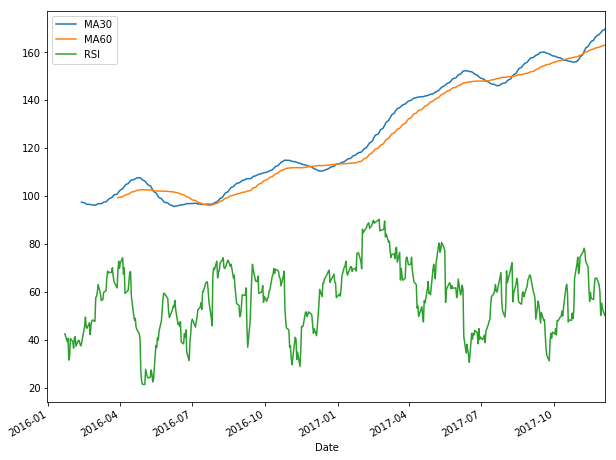

In [271]:
#畫出AAPL-短天期移動平均線 MA30與長天期移動平均線 MA60及14天的強弱指標 RSI
plt.figure()
df[['MA30','MA60','RSI']].plot(legend='best', figsize=(10,8))

# Q5. 策略回測

In [272]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [273]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]